In [1]:
#Differences between this and other sets: 
#I tried to remove the source info from the sets so that this model will be usable in a chrome extension that will check text highlighted by the user
#While the accuracy score is lower than other models, it still has a high accuracy while only reading the text value with excluded source identifying info (twitter/reuters)

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv('/Users/adam/Main/HackAI/news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#Get labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [5]:
#Split 30-70 for test-train
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.3, random_state=7)

In [6]:
#Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
vec_train = vectorizer.fit_transform(x_train)
vec_test = vectorizer.transform(x_test)

In [7]:
#Initialize PA Classifier
PAC = PassiveAggressiveClassifier(max_iter=50) #initialize
PAC.fit(vec_train, y_train) #fit to x/y train sets
y_pred = PAC.predict(vec_test) #predict values from text_test files
score = accuracy_score(y_test, y_pred) #score the results
print("Accuracy Score: {0:.5%}".format(score))

Accuracy Score: 92.42504%


True Positives:  902
False Negatives:  72
False Positives:  72
True Negatives:  855
Accuracy Score: 92.42504%


Text(0, 0.5, 'Actual Answer')

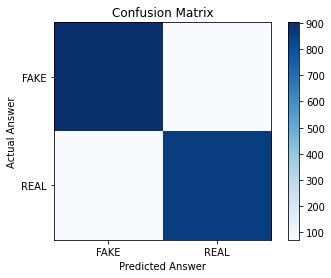

In [8]:
CM = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print('True Positives: ', CM[0][0])
print('False Negatives: ', CM[0][1])
print('False Positives: ', CM[1][0])
print('True Negatives: ', CM[1][1])
y_pred = PAC.predict(vec_test) #predict values from text_test files
score = accuracy_score(y_test, y_pred) #score the results
print("Accuracy Score: {0:.5%}".format(score))
plt.imshow(CM, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(['FAKE', 'REAL']))
plt.xticks(tick_marks, ['FAKE', 'REAL'])
plt.yticks(tick_marks, ['FAKE', 'REAL'])
plt.xlabel('Predicted Answer')
plt.ylabel('Actual Answer')

In [9]:
modelname = 'Model_pacTextOnly.pkl'
vectorname = 'Vectorizer_pacTextOnly.pkl'
pickle.dump(PAC, open(modelname, 'wb'))
pickle.dump(vectorizer, open(vectorname, 'wb'))